In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
num_1 = np.random.randint(-10, 11, 2000)
num_2 = np.random.randint(-10, 11, 2000)
labels_np = num_1+num_2

data_np = np.stack((num_1, num_2)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, labels_tensor, test_size=0.1, random_state=14)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_dataloader = DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [4]:
annModel = nn.Sequential(nn.Linear(2, 8), nn.ReLU(), nn.Linear(8, 4), nn.ReLU(), nn.Linear(4, 1))

loss_fun = nn.MSELoss()

optimizer = torch.optim.Adam(annModel.parameters(), lr=0.01)

In [5]:
num_epochs = 100

def trainModel():

    losses = torch.zeros(num_epochs)
    train_acc = []
    test_acc = []

    for epoch in range(num_epochs):

        annModel.train()

        batch_loss = []
        batch_acc = []

        for x, y in train_dataloader:
            y_hat = annModel(x)

            loss = loss_fun(y_hat.squeeze(), y)

            batch_loss.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(100*torch.sum(torch.abs(y_hat.squeeze() - y) < 0.01).item()/(y.shape[0]))

        train_acc.append(np.mean(batch_acc))

        losses[epoch] = np.mean(batch_loss)

        annModel.eval()
        x, y = next(iter(test_dataloader))
        with torch.no_grad():
            test_acc.append(100*torch.sum(torch.abs(annModel(x).squeeze() - y) < 0.01).item()/(y.shape[0]))

    return losses, train_acc, test_acc

In [6]:
losses, train_acc, test_acc = trainModel()

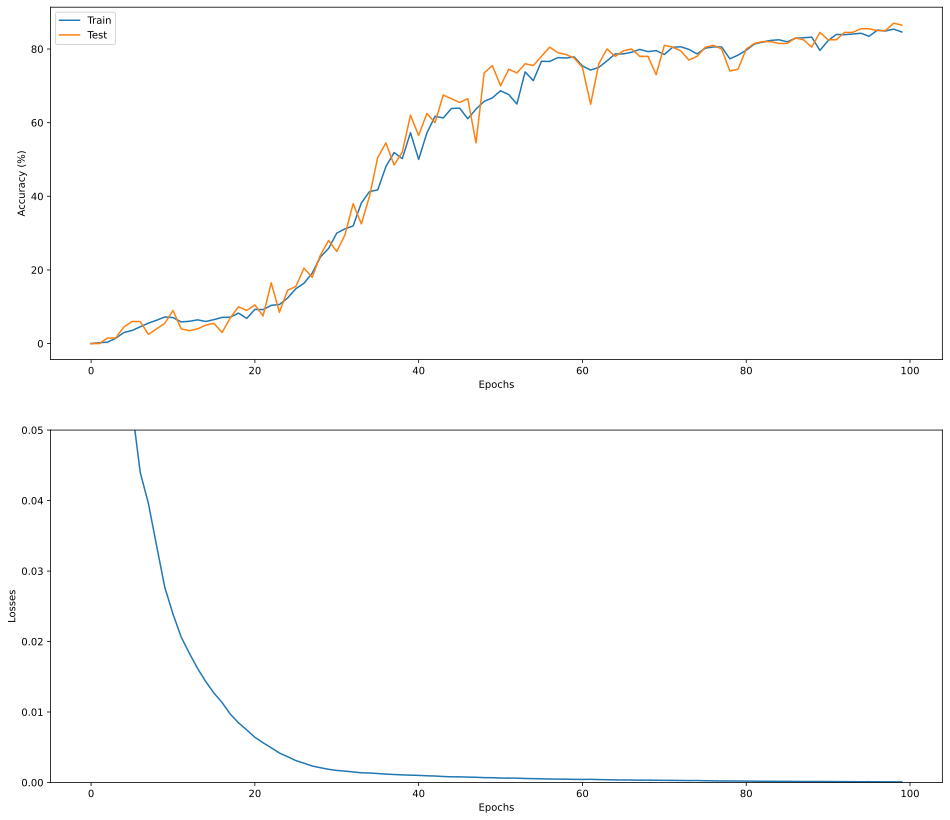

In [7]:
_, axis = plt.subplots(2, 1, figsize=(16, 14))

axis[0].plot(train_acc, label="Train")
axis[0].plot(test_acc, label="Test")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Accuracy (%)")
axis[0].legend()

axis[1].plot(losses)
axis[1].set_xlabel("Epochs")
axis[1].set_ylim([0, 0.05])
axis[1].set_ylabel("Losses");

In [8]:
num_1 = np.random.randint(-15, 15, 500)
num_2 = np.random.randint(-15, 15, 500)
labels_np = num_1+num_2

data_np = np.stack((num_1, num_2)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

In [9]:
predictions = annModel(data_tensor)

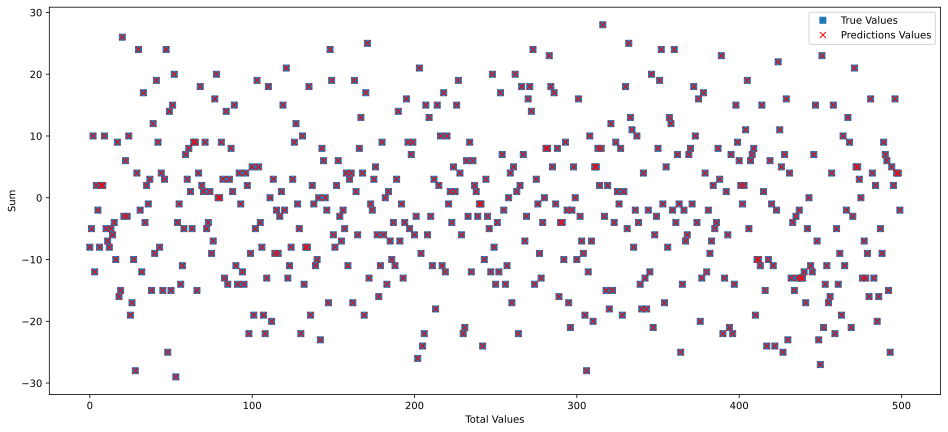

In [10]:
plt.figure(figsize=(16, 7))
plt.plot(labels_tensor, 's')
plt.plot(np.round(predictions.detach()), 'rx')
plt.xlabel("Total Values")
plt.ylabel("Sum")
plt.legend(["True Values", "Predictions Values"]);